In this notebook I train a logistic regression model on the data set "pairs_final_diffed_us.csv". That data is picked form "pairs.csv" and limited to country code US.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\tim_code\working_data\pairs_final_diffed_us.csv")

In [7]:
data.columns

Index(['Unnamed: 0', 'theta_diff', 'name_cosines', 'full_address_cosines',
       'categories_cosines', 'match'],
      dtype='object')

In [8]:
data = data.drop('Unnamed: 0', axis =1)

In [9]:
data.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
0,0.000002,0.707107,0.612372,1.0,True
1,0.000082,1.000000,0.534522,-1.0,True
2,0.000019,1.000000,1.000000,1.0,True
3,0.000253,0.816497,1.000000,0.0,False
4,0.000119,0.000000,0.566947,1.0,True


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117793 entries, 0 to 117792
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   theta_diff            117793 non-null  float64
 1   name_cosines          117793 non-null  float64
 2   full_address_cosines  117793 non-null  float64
 3   categories_cosines    117793 non-null  float64
 4   match                 117793 non-null  bool   
dtypes: bool(1), float64(4)
memory usage: 3.7 MB


In [11]:
data_corr = data.corr()

<AxesSubplot:>

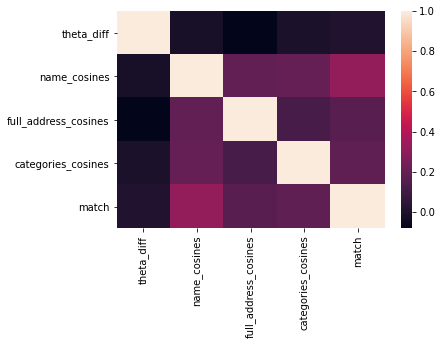

In [12]:
sns.heatmap(data_corr)

In [13]:
x_col = ['theta_diff', 'name_cosines', 'full_address_cosines', 'categories_cosines']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data[x_col], data['match'],
                                                    shuffle = True,
                                                    random_state = 614,
                                                   test_size = 0.2,
                                                   stratify = data['match'])

In [51]:
x_train.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines
33881,0.000025,0.617213,1.000000,1.000000
39408,0.000002,1.000000,1.000000,0.816497
19590,0.000834,1.000000,1.000000,1.000000
12786,0.000019,0.816497,0.816497,0.000000
107603,0.000041,0.816497,1.000000,1.000000


In [52]:
x_test.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines
112604,1.285242e-04,0.0,1.000000,0.816497
78308,4.886311e-04,0.0,0.534522,0.408248
104041,7.364731e-05,1.0,1.000000,1.000000
28064,4.570212e-05,1.0,0.612372,0.000000
48531,5.420419e-07,0.0,0.707107,1.000000


In [17]:
y_train.head()

33881     False
39408      True
19590      True
12786      True
107603     True
Name: match, dtype: bool

In [55]:
len(y_train[y_train == True])/len(y_train[y_train == False])

2.55667107001321

In [56]:
len(y_train[y_train == True])/len(y_train)

0.7188382112613282

In [18]:
lreg = LogisticRegression()

In [19]:
lreg.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = lreg.predict(x_test)

In [21]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 1813,  4811],
       [ 1391, 15544]], dtype=int64)

In [23]:
roc_auc_score(y_test, y_pred)

0.5957820529689393

In [ ]:
y_pred/y_test

# A Naive Model

In [57]:
sample_arr = [True, False]

naive_pred = np.random.choice(sample_arr, len(y_test))

In [58]:
confusion_matrix(y_test, naive_pred)

array([[3392, 3232],
       [8519, 8416]], dtype=int64)

In [59]:
roc_auc_score(y_test, naive_pred)

0.5045181277091009

In [60]:
sample_arr = [True]

naive_pred = np.random.choice(sample_arr, len(y_test))

In [61]:
naive_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
confusion_matrix(y_test, naive_pred)

array([[    0,  6624],
       [    0, 16935]], dtype=int64)

In [63]:
roc_auc_score(y_test, naive_pred)

0.5

In [64]:
len(y_test)

23559